In [8]:
import cfl
from espirit import espirit, espirit_proj, ifft

import matplotlib.pyplot as plt
import numpy as np

# Load data
X = cfl.readcfl('data/knee')

x = ifft(X, (0, 1, 2))


In [9]:
print(X.shape)
print(x.shape)

(1, 320, 256, 8)
(1, 320, 256, 8)


In [ ]:
# Derive ESPIRiT operator
esp = espirit(X, 6, 24, 0.01, 0.9925)
# Do projections
ip, proj, null = espirit_proj(x, esp)


Close figures to continue execution...


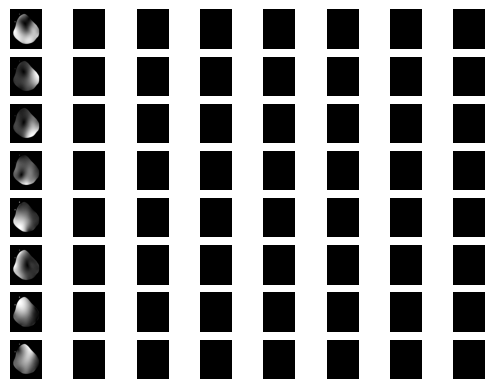

NOTE: Contrast has been changed


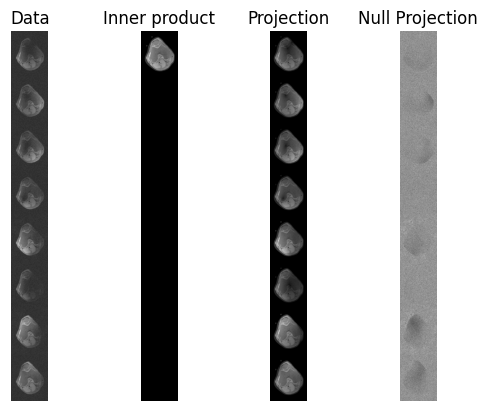

In [5]:
# Figure code

esp  = np.squeeze(esp)
x    = np.squeeze(x)
ip   = np.squeeze(ip)
proj = np.squeeze(proj)
null = np.squeeze(null)

print("Close figures to continue execution...")

# Display ESPIRiT operator
for idx in range(8):
    for jdx in range(8):
        plt.subplot(8, 8, (idx * 8 + jdx) + 1)
        plt.imshow(np.abs(esp[:,:,idx,jdx]), cmap='gray')
        plt.axis('off')
plt.show()

dspx = np.power(np.abs(np.concatenate((x[:, :, 0], x[:, :, 1], x[:, :, 2], x[:, :, 3], x[:, :, 4], x[:, :, 5], x[:, :, 6], x[:, :, 7]), 0)), 1/3)
dspip = np.power(np.abs(np.concatenate((ip[:, :, 0], ip[:, :, 1], ip[:, :, 2], ip[:, :, 3], ip[:, :, 4], ip[:, :, 5], ip[:, :, 6], ip[:, :, 7]), 0)), 1/3)
dspproj = np.power(np.abs(np.concatenate((proj[:, :, 0], proj[:, :, 1], proj[:, :, 2], proj[:, :, 3], proj[:, :, 4], proj[:, :, 5], proj[:, :, 6], proj[:, :, 7]), 0)), 1/3)
dspnull = np.power(np.abs(np.concatenate((null[:, :, 0], null[:, :, 1], null[:, :, 2], null[:, :, 3], null[:, :, 4], null[:, :, 5], null[:, :, 6], null[:, :, 7]), 0)), 1/3)

print("NOTE: Contrast has been changed")

# Display ESPIRiT projection results 
plt.subplot(1, 4, 1)
plt.imshow(dspx, cmap='gray')
plt.title('Data')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(dspip, cmap='gray')
plt.title('Inner product')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(dspproj, cmap='gray')
plt.title('Projection')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(dspnull, cmap='gray')
plt.title('Null Projection')
plt.axis('off')
plt.show()

In [3]:
X.shape

(1, 320, 256, 8)